<a href="https://colab.research.google.com/github/Pedro-Henrique8899-eng/covid-19-data/blob/master/analisando_casos_de_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Panorama da Covid-19

Sabemos que a Covid-19 é uma doença causada por um vírus que foi descoberto recentemente.

É transmitida por meio de gotículas originadas de tosses ou espirros de pessoas que se encontram infectadas com o vírus. A gravidade e a forma como os sintomas se manifestam varia de acordo com a pessoa.

Hoje tem-se algum conhecimento acerca do vírus, estudos são feitos pelo mundo todo, mas fato é que ainda existem muitas perguntas sem respostas e os resultados ainda não são 100% eficazes.

Recentemente desenvolveram as vacinas, mas há um grande número de pessoas a serem vacinadas, e com ainda poucas doses prontas para o uso, o vírus segue se disseminando. 

Irei fazer uma análise com dados públicos acerca da doença, com objetivo de aumentar o nível de consciência da população e fazer um levantamento sobre alguns pontos da doença.


## Obtenção de Dados

A coleta de dados para análises tem sido um desafio e tanto durante o período pandêmico, uma vez que, as fontes para obtenção de dados são as mais variadas. Temos os dados disponiblizados pelo governo federal, imprensa, pelos estados e os dados não oficiais.

Analisar uma doença nova já é um desafio gigantesco, em um país como o Brasil onde não se tem uma cultura de dados esse desafio se torna ainda maior.

## Dicionário de Variáveis

* ...iso_code - código                                         
* ...continent - continente                                        
* ...location - localização                                        
* ...date - data                                   
* ...total_cases - total de casos                                    
* ...new_cases - novos casos                                     
* ...new_cases_smoothed - novos casos suavizados                           
* ...total_deaths - total de mortes                                   
* ...new_deaths - novas mortes                                     
* ...new_deaths_smoothed - novas mortes suavizadas                           
* ...total_cases_per_million - total de casos por milhão                        
* ...new_cases_per_million - novos casos por milhão                          
* ...new_cases_smoothed_per_million - novos casos suavizados por milhão               
* ...total_deaths_per_million - total de casos por milhão                        
* ...new_deaths_per_million - novas mortes por milhão                         
* ...new_deaths_smoothed_per_million - novas mortes suavizadas por milhão                
* ...reproduction_rate - taxa de reprodução                             
* ...icu_patients - pacientes na UTI                                   
* ...icu_patients_per_million - UTI para pacientes por milhão                    
* ...hosp_patients - pacientes de hospital                                   
* ...hosp_patients_per_million - pacientes de hospital por milhão                    
* ...weekly_icu_admissions - admissão semanal na UTI                           
* ...weekly_icu_admissions_per_million - admissão semanal na UTI por milhão              
* ...weekly_hosp_admissions - internações semanais                          
* ...weekly_hosp_admissions_per_million - internações semanais por milhão            
* ...new_tests - novos testes                                      
* ...total_tests - total de testes                                 
* ...total_tests_per_thousand - total de testes por mil                   
* ...new_tests_per_thousand - novos testes por mil                         
* ...new_tests_smoothed - novos testes suavizados                             
* ...new_tests_smoothed_per_thousand - novos testes suavizados por mil                
* ...positive_rate - taxa positiva                                  
* ...tests_per_case - testes por caso                                 
* ...tests_units - unidades de teste                                   
* ...total_vaccinations - total de vacinações                             
* ...people_vaccinated - pessoas vacinadas                              
* ...people_fully_vaccinated - pessoas totalmente vacinadas                        
* ...new_vaccinations - novas vacinações                              
* ...new_vaccinations_smoothed - novas vacinações suavizadas                      
* ...total_vaccinations_per_hundred - vacinação total por cem habitantes                 
* ...people_vaccinated_per_hundred - pessoas vacinadas por cem habitantes                  
* ...people_fully_vaccinated_per_hundred - pessoas totalmente vacinadas por cem habitantes     
* ...new_vaccinations_smoothed_per_million - novas vacinações suavizadas por milhão          
* ...stringency_index - índice de rigor                              
* ...population - população                                     
* ...population_density - densidade populacional                            
* ...median_age - idade média                                    
* ...aged_65_older - com 65 anos de idade                                
* ...aged_70_older - com 70 anos de idade                                  
* ...gdp_per_capita - PIB per capita                                
* ...extreme_poverty - pobreza extrema                 
* ...cardiovasc_death_rate - taxa de mortalidade cardiovascular                             
* ...diabetes_prevalence - prevalência de diabetes                         
* ...female_smokers - fumantes femininas                                
* ...male_smokers - fumantes masculinos                                  
* ...handwashing_facilities - instalações para lavagem das mãos                        
* ...hospital_beds_per_thousand - leitos de hospitais por  mil habitantes                       
* ...life_expectancy - expectativa de vida                               
* ...human_development_index - índice de desenvolvimento humano                         


## Importando os dados do Covid-19

*  Os dados utilizados nesta análise foram obtidos em (https://raw.githubusercontent.com/Pedro-Henrique8899-eng/data_science_sigmoidal/main/owid-covid-data.csv). Utilizaremos o formato `csv` desse arquivo.



*  A variável `df` irá receber o endereço do arquivo

   df = pd.read_csv('Endereço_do_arquivo.csv')

In [2]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importando o Dataset da Covid-19 para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Pedro-Henrique8899-eng/data_science_sigmoidal/main/owid-covid-data.csv')


## Análise Exploratória de Dados

A etapa de análise exploratória dos dados é uma etapa extremamente importante, pois será através dela que vamos obter informações referentes aos dados que estamos trabalhando e como eles estão estruturados.


## Análise Exploratória inicial

De início, faremos uma breve exploração dos dados afim de verificar algumas informações relevantes para que possamos prosseguir para uma análise um pouco mais detalhada.

In [4]:
# verificando as primeiras 5 entradas do DataFrame
print('Quantidade de linhas: {}' .format(df.shape[0]))
print('Quantidade de colunas: {}'.format(df.shape[1]))

Quantidade de linhas: 75558
Quantidade de colunas: 59


Acima podemos observar que o nosso dataset possui 75558 linhas e 59 colunas.

In [5]:
# verificando as primeiras 5 entradas
df.head() 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [6]:
# verificando o nome das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Podemos verificar todos os nomes de cada uma das colunas do nosso DataFrame.

A variável date é dada como um objeto do tipo string. Com isso, vamos transformá-la em um objeto do tipo datetime.

In [7]:
# transformando a variável date em um objeto do tipo datetime
df['date'] = pd.to_datetime(df.date)

In [8]:
# verificando os tipos das variáveis
df.dtypes

iso_code                                         object
continent                                        object
location                                         object
date                                     datetime64[ns]
total_cases                                     float64
new_cases                                       float64
new_cases_smoothed                              float64
total_deaths                                    float64
new_deaths                                      float64
new_deaths_smoothed                             float64
total_cases_per_million                         float64
new_cases_per_million                           float64
new_cases_smoothed_per_million                  float64
total_deaths_per_million                        float64
new_deaths_per_million                          float64
new_deaths_smoothed_per_million                 float64
reproduction_rate                               float64
icu_patients                                    

É importante que verifiquemos a porcentagem de valores nulos em cada uma das colunas do nosso Quadro de Dados. Faremos isso na ordem decrescente.

In [9]:
# verificando a porcentagem de valores nulos em cada coluna
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.990961
weekly_icu_admissions_per_million        0.990961
weekly_hosp_admissions                   0.983311
weekly_hosp_admissions_per_million       0.983311
people_fully_vaccinated                  0.962585
people_fully_vaccinated_per_hundred      0.962585
new_vaccinations                         0.946690
people_vaccinated                        0.943950
people_vaccinated_per_hundred            0.943950
total_vaccinations                       0.937558
total_vaccinations_per_hundred           0.937558
new_vaccinations_smoothed                0.906350
new_vaccinations_smoothed_per_million    0.906350
icu_patients                             0.897311
icu_patients_per_million                 0.897311
hosp_patients                            0.876426
hosp_patients_per_million                0.876426
total_tests                              0.550742
total_tests_per_thousand                 0.550742
new_tests                                0.547831


É possível observar que uma grande quantidade das colunas possuem quase 100% dos seus valores faltantes. Outras aproximadamente a metade e algumas uma porcentagem pequena.

Apenas as colunas *iso_code*, *location* e *date* não possuem valores ausentes.

É importante nos atentarmos para o motivo dessa grande quantidade de dados estarem faltando em nosso DataSet.


 Agora vamos verificar a data mais atual quais os países tem mais mortes e casos confirmados.

 Para isso, antes iremos verificar qual a data mais atual do nosso dataset.

In [10]:
# verificando a data mais atual
df.date.max()

Timestamp('2021-03-17 00:00:00')

In [11]:
# verificando para a data mais atual quais os países que tem mais casos confirmados e mortes
df.loc[df.date == '2021-03-17'].sort_values(by='total_cases', ascending=False)
df.loc[df.date == '2021-03-17'].sort_values(by='total_deaths', ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
74487,OWID_WRL,NaN,World,2021-03-17,121197710.0,500675.0,443294.571,2680445.0,9992.0,8624.000,15548.536,64.232,56.871,343.876,1.282,1.106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400277966.0,238031778.0,91626189.0,8389823.0,10125199.0,5.14,3.05,1.18,1299.0,NaN,7.794799e+09,58.045,30.9,8.696,5.355,15469.207,10.0,233.070,8.51,6.434,34.635,60.130,2.705,72.58,0.737
23408,OWID_EUR,NaN,Europe,2021-03-17,36946053.0,169957.0,169533.286,867892.0,3311.0,3054.429,49348.252,227.009,226.443,1159.229,4.422,4.080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92342664.0,70610022.0,21702225.0,612088.0,1629956.0,12.33,9.43,2.90,2177.0,NaN,7.486801e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50114,OWID_NAM,NaN,North America,2021-03-17,34097469.0,72685.0,66642.429,783747.0,2074.0,1813.429,57590.052,122.764,112.558,1323.736,3.503,3.063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122687586.0,81709972.0,41308707.0,2657267.0,2817605.0,20.72,13.80,6.98,4759.0,NaN,5.920722e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23828,OWID_EUN,NaN,European Union,2021-03-17,24471814.0,127812.0,130616.286,582950.0,2264.0,2089.143,55002.845,287.270,293.573,1310.238,5.089,4.696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53196532.0,37233295.0,15963237.0,420178.0,1072479.0,11.96,8.37,3.59,2411.0,NaN,4.449191e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72034,USA,North America,United States,2021-03-17,29607483.0,58480.0,54821.857,538087.0,1173.0,1230.429,89447.874,176.675,165.624,1625.627,3.544,3.717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,113037627.0,73669956.0,39989196.0,2299771.0,2473762.0,33.80,22.03,11.96,7397.0,64.35,3.310026e+08,35.608,38.3,15.413,9.732,54225.446,1.2,151.089,10.79,19.100,24.600,NaN,2.770,78.86,0.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57944,WSM,Oceania,Samoa,2021-03-17,3.0,0.0,0.000,NaN,NaN,0.000,15.120,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.984100e+05,69.413,22.0,5.606,3.564,6021.557,NaN,348.977,9.21,16.700,38.100,NaN,NaN,73.32,0.715
61911,SLB,Oceania,Solomon Islands,2021-03-17,18.0,0.0,0.000,NaN,NaN,0.000,26.206,0.000,0.000,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.868780e+05,21.841,20.8,3.507,2.043,2205.923,25.1,459.780,18.68,NaN,NaN,35.890,1.400,73.00,0.567
68516,TLS,Asia,Timor,2021-03-17,216.0,8.0,10.143,NaN,NaN,0.000,163.830,6.0

Para que possamos entender melhor essa distribuição, plotaremos um gráfico de barras.

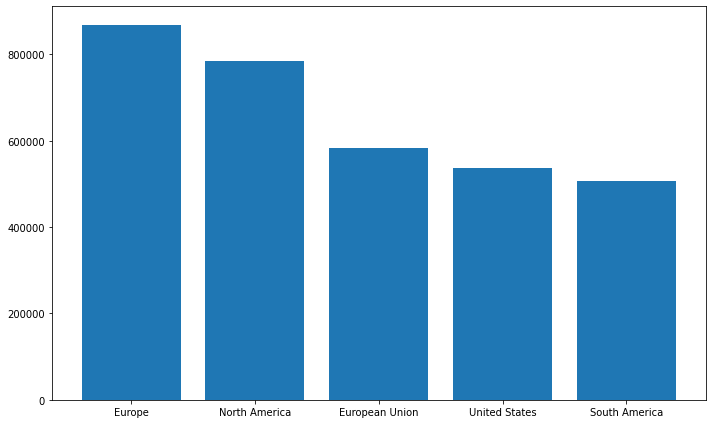

In [38]:
# plotar um gráfico de barras para os 5 lugares com mais mortes
top_5_total_deaths = df.loc[df.date == '2021-03-17', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

fig, ax = plt.subplots(figsize=(10,6))

ax.bar('location', 'total_deaths', data=top_5_total_deaths)

plt.tight_layout()

Podemos ver que a Europa possui o maior índice de mortos, seguida pela América do Norte, União Europeia, Estados Unidos e América do Sul.

## Como é o progresso da Covid-19?

Uma das inúmeras preocupações das organizações de saúde é como o vírus progride  e o número de mortes.

Para estudar esse comportando, utilizaremos um Line_Chart(Gráfico de Linhas) que é um boa representação gráfica para estudar comportamentos ao longo tempo.

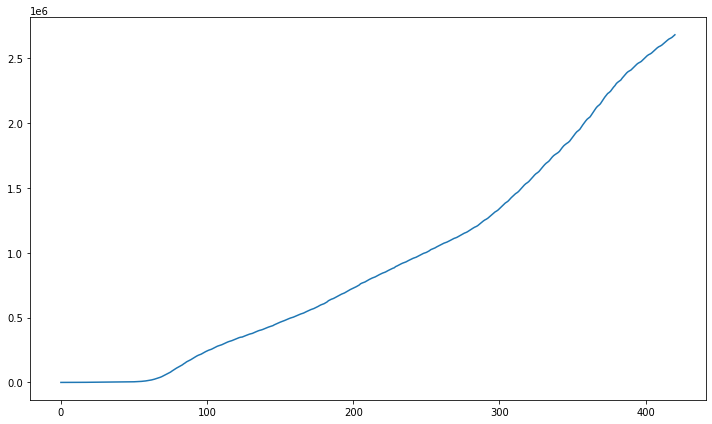

In [41]:
# gráfico de linha para mortes no mundo
df.loc[df.location == 'World', 'total_deaths'].reset_index(drop=True).plot(figsize=(10,6));

plt.tight_layout()

## Conclusão

É importante salientar que essa base de dados é atualizada diariamente, consequentemente essa análise ficará desatualizada rapidamente.

Algumas observações feitas levando em consideração a análise feita:

*  A Europa lidera disparadamente o número de mortes
*  Os casos de morte por Covid-19 continuam aumentando em proporções avaçaladoras

Análises mais detalhadas podem ser feitas utilizando esse conjunto de dados. Contudo, essa análise já contém um número considerável de informações. 